In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
import seaborn as sns

In [3]:
np.random.seed(20220721)

In [4]:
d = pd.read_csv(
    "/home/jovyan/tuh_abnormal_description.csv",
    index_col=0,
)

<AxesSubplot: >

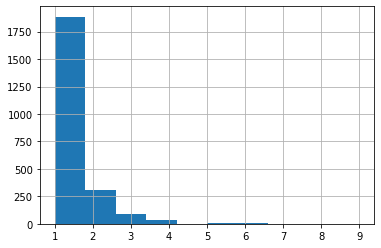

In [5]:
d.value_counts('subject').hist()

In [6]:
d = d.sort_values('age')

In [7]:
d

,path,version,year,month,day,subject,session,segment,train,pathological,age,gender
1786,/home/jovyan/mne_data/TUH/tuh_eeg_abnormal/v2....,v2.0.0,2012,7,23,8982,1,4,True,True,0,M
265,/home/jovyan/mne_data/TUH/tuh_eeg_abnormal/v2....,v2.0.0,2010,5,5,7304,2,2,True,True,0,F
2768,/home/jovyan/mne_data/TUH/tuh_eeg_abnormal/v2....,v2.0.0,2013,7,11,10505,1,2,True,False,0,F
2982,/home/jovyan/mne_data/TUH/tuh_eeg_abnormal/v2....,v2.0.0,2013,10,3,10831,1,0,True,False,1,M
1684,/home/jovyan/mne_data/TUH/tuh_eeg_abnormal/v2....,v2.0.0,2012,6,8,9424,1,4,True,True,1,M
...,...,...,...,...,...,...,...,...,...,...,...,...
2798,/home/jovyan/mne_data/TUH/tuh_eeg_abnormal/v2....,v2.0.0,2013,7,21,10540,1,1,True,True,91,F
994,/home/jovyan/mne_data/TUH/tuh_eeg_abnormal/v2....,v2.0.0,2011,10,7,8445,1,1,True,True,92,F
947,/home/jovyan/mne_data/TUH/tuh_eeg_abnormal/v2....,v2.0.0,2011,9,14,8406,1,1,True,False,95,F
1006,/home/jovyan/mne_data/TUH/tuh_eeg_abnormal/v2....,v2.0.0,2011,10,13,8181,1,0,True,True,95,M


<AxesSubplot: ylabel='Frequency'>

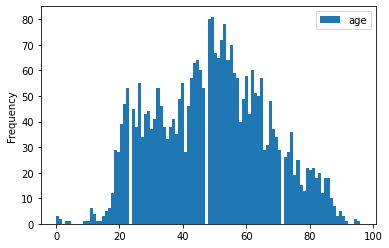

In [8]:
d.plot(y='age', kind='hist', bins=100)

In [9]:
ages = d['age']

In [9]:
bins = np.linspace(0, 100, 11, dtype=int)

In [10]:
for i, l in enumerate(bins[:-1]):
    h = bins[i+1]
    print(l, h)
    break

0 10


In [11]:
{i: ages[(ages >= l) & (ages < h)]}

{0: 1786    0
 265     0
 2768    0
 2982    1
 1684    1
 2398    3
 1619    4
 1614    9
 Name: age, dtype: int64}

In [12]:
len(ages)//10

299

In [13]:
[ages[i*10:i*10+10:].index.to_list() for i in range(len(ages)//10)]

/tmp/ipykernel_1706/1809456442.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  [ages[i*10:i*10+10:].index.to_list() for i in range(len(ages)//10)]


[[1786, 265, 2768, 2982, 1684, 2398, 1619, 1614, 1945, 1930],
 [1708, 2122, 1705, 1326, 1763, 2926, 2916, 118, 2975, 2279],
 [779, 775, 296, 321, 1382, 1500, 698, 1944, 1424, 2363],
 [1914, 1547, 135, 2644, 2876, 1810, 189, 1806, 2506, 199],
 [577, 428, 2913, 630, 870, 285, 2753, 2552, 1509, 2783],
 [1507, 134, 612, 517, 1556, 2189, 978, 1748, 2115, 2093],
 [2084, 2036, 1998, 396, 398, 898, 1949, 2478, 958, 1842],
 [1929, 1240, 1749, 1835, 2437, 230, 483, 684, 2444, 378],
 [2269, 390, 2431, 2654, 1537, 401, 2320, 138, 1807, 1829],
 [2384, 2595, 2588, 1573, 525, 2739, 1517, 1014, 1045, 951],
 [1128, 54, 868, 2786, 1126, 1524, 2559, 499, 2499, 1671],
 [1068, 2634, 1477, 200, 1712, 1623, 1770, 2425, 322, 2157],
 [2960, 384, 2959, 2958, 1475, 2955, 2331, 929, 1921, 435],
 [1874, 2386, 2951, 1140, 2992, 1200, 1335, 2761, 2754, 1460],
 [647, 85, 700, 2528, 809, 342, 1091, 1370, 960, 1590],
 [1580, 232, 455, 39, 1080, 1837, 967, 289, 1299, 16],
 [1274, 1769, 990, 995, 998, 96, 2879, 1102, 157

In [14]:
{0: 2}.pop(0)

2

In [15]:
from sklearn.model_selection import train_test_split


def train_eval_split(df):
    train, eval = train_test_split(df, test_size=1/10, random_state=seed)
    return sorted(train.index.to_list()), sorted(eval.index.to_list())


def train_valid_split(df, valid_set_i):
    train, valid1 = train_test_split(df, test_size=1/5, random_state=seed)
    train, valid2 = train_test_split(train, test_size=1/4, random_state=seed)
    train, valid3 = train_test_split(train, test_size=1/3, random_state=seed)
    valid4, valid5 = train_test_split(train, test_size=1/2, random_state=seed)
    valid_sets = {
        0: valid1.index.to_list(),
        1: valid2.index.to_list(),
        2: valid3.index.to_list(),
        3: valid4.index.to_list(),
        4: valid5.index.to_list(),
    }
    valid_is = sorted(valid_sets.pop(valid_set_i))
    train_is = sorted([l for k, v in valid_sets.items() for l in v])
    return train_is, valid_is

In [18]:
train, eval = train_eval_split(d)
len(train), len(eval)

(2693, 300)

In [19]:
train, valid = train_valid_split(d, 0)
len(train), len(valid)

(2394, 599)

In [16]:
from sklearn.model_selection import KFold, train_test_split

In [37]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
sns.set_color_codes('deep')

/tmp/ipykernel_6965/3909244923.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [18]:
bins = np.linspace(0, 100, 21, dtype=int)
#seed = 20220726
seed = 20220726

Text(0.5, 0, 'Age [years]')

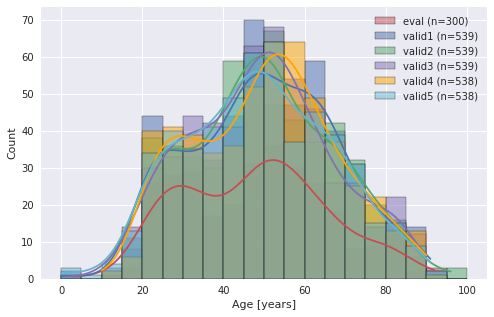

In [19]:
fig, ax = plt.subplots(1,1,figsize=(8,5))
train, eval = train_test_split(d, test_size=1/10, random_state=seed)
#sns.histplot(train, kde=True, bins=bins)
ax = sns.histplot(eval.age, kde=True, bins=bins, label=f'eval (n={len(eval)})', ax=ax, color='r')
train, valid1 = train_test_split(train, test_size=1/5, random_state=seed)
#sns.histplot(train, kde=True, bins=bins)
ax = sns.histplot(valid1.age, kde=True, bins=bins, label=f'valid1 (n={len(valid1)})', ax=ax, color='b')
train, valid2 = train_test_split(train, test_size=1/4, random_state=seed)
#sns.histplot(train, kde=True, bins=bins)
ax = sns.histplot(valid2.age, kde=True, bins=bins, label=f'valid2 (n={len(valid2)})', ax=ax, color='g')
train, valid3 = train_test_split(train, test_size=1/3, random_state=seed)
#sns.histplot(train, kde=True, bins=bins)
ax = sns.histplot(valid3.age, kde=True, bins=bins, label=f'valid3 (n={len(valid3)})', ax=ax, color='m')
valid4, valid5 = train_test_split(train, test_size=1/2, random_state=seed)
ax = sns.histplot(valid4.age, kde=True, bins=bins, label=f'valid4 (n={len(valid4)})', ax=ax, color='orange')
ax = sns.histplot(valid5.age, kde=True, bins=bins, label=f'valid5 (n={len(valid5)})', ax=ax, color='c')
ax.legend()
ax.set_xlabel('Age [years]')
# fig.savefig('/home/jovyan/tuh_abnormal_re_split_2.png', bbox_inches='tight', dpi=300)

Text(0.5, 0, 'Age [years]')

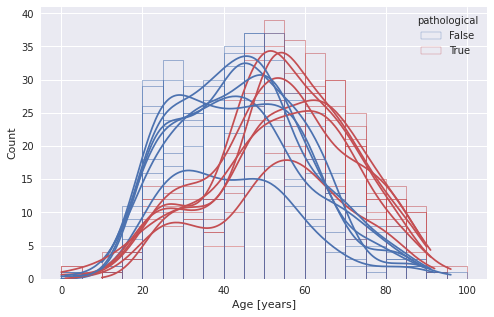

In [20]:
fig, ax = plt.subplots(1,1,figsize=(8,5))
train, eval = train_test_split(d, test_size=1/10, random_state=seed)
#sns.histplot(train, kde=True, bins=bins)
ax = sns.histplot(data=eval, x='age', kde=True, bins=bins, ax=ax, hue='pathological', fill=False, palette=['b', 'r'])
train, valid1 = train_test_split(train, test_size=1/5, random_state=seed)
#sns.histplot(train, kde=True, bins=bins)
ax = sns.histplot(data=valid1, x='age', kde=True, bins=bins, ax=ax, hue='pathological', fill=False, palette=['b', 'r'])
train, valid2 = train_test_split(train, test_size=1/4, random_state=seed)
#sns.histplot(train, kde=True, bins=bins)
ax = sns.histplot(data=valid2, x='age', kde=True, bins=bins, ax=ax, hue='pathological', fill=False, palette=['b', 'r'])
train, valid3 = train_test_split(train, test_size=1/3, random_state=seed)
#sns.histplot(train, kde=True, bins=bins)
ax = sns.histplot(data=valid3, x='age', kde=True, bins=bins, ax=ax, hue='pathological', fill=False, palette=['b', 'r'])
valid4, valid5 = train_test_split(train, test_size=1/2, random_state=seed)
ax = sns.histplot(data=valid4, x='age', kde=True, bins=bins, ax=ax, hue='pathological', fill=False, palette=['b', 'r'])
ax = sns.histplot(data=valid5, x='age', kde=True, bins=bins, ax=ax, hue='pathological', fill=False, palette=['b', 'r'])
ax.set_xlabel('Age [years]')
# fig.savefig('/home/jovyan/tuh_abnormal_re_split.png', bbox_inches='tight', dpi=300)

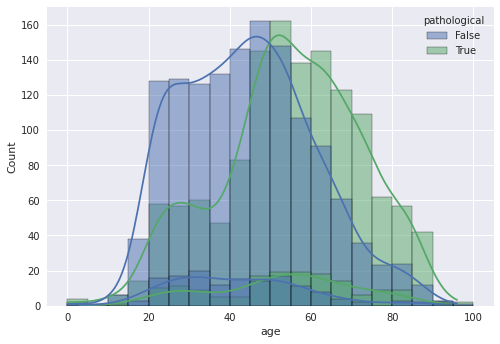

In [21]:
train, eval = train_test_split(d, test_size=1/10, random_state=seed)
ax = sns.histplot(data=train, x='age', kde=True, bins=bins, hue='pathological')
ax = sns.histplot(data=eval, x='age', hue='pathological', kde=True, bins=bins, label=f'eval (n={len(eval)})')

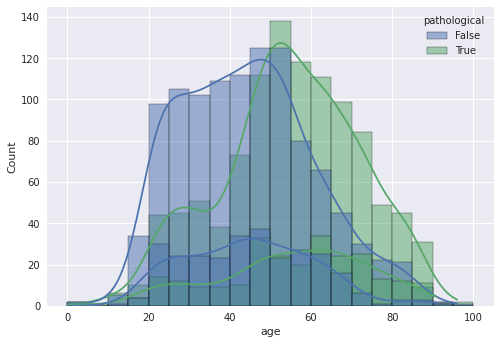

In [22]:
train, valid1 = train_test_split(train, test_size=1/5, random_state=seed)
ax = sns.histplot(data=train, x='age', kde=True, bins=bins, hue='pathological')
ax = sns.histplot(data=valid1, x='age', kde=True, bins=bins, label=f'valid1 (n={len(valid1)})', ax=ax, hue='pathological')

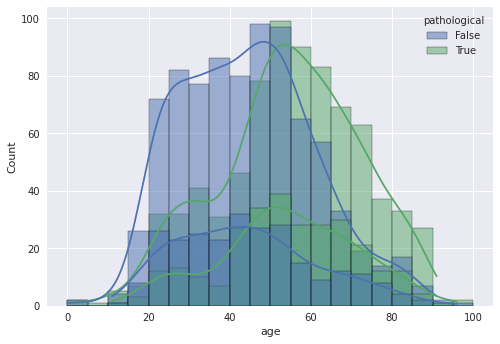

In [23]:
train, valid2 = train_test_split(train, test_size=1/4, random_state=seed)
ax = sns.histplot(data=train, x='age', kde=True, bins=bins, hue='pathological')
ax = sns.histplot(data=valid2, x='age', kde=True, bins=bins, label=f'valid2 (n={len(valid2)})', ax=ax, hue='pathological')

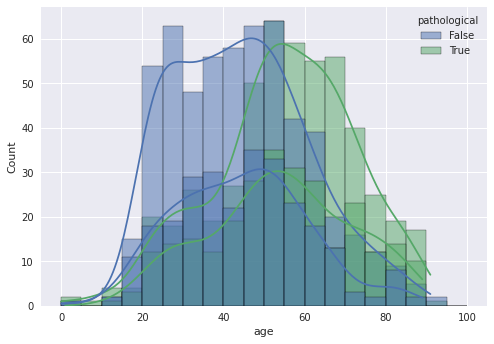

In [24]:
train, valid3 = train_test_split(train, test_size=1/3, random_state=seed)
ax = sns.histplot(data=train, x='age', kde=True, bins=bins, hue='pathological')
ax = sns.histplot(data=valid3, x='age', kde=True, bins=bins, label=f'valid3 (n={len(valid3)})', ax=ax, hue='pathological')

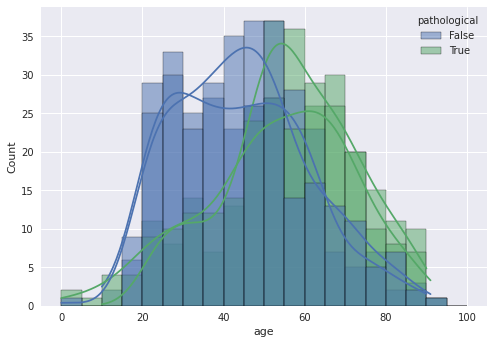

In [25]:
valid4, valid5 = train_test_split(train, test_size=1/2, random_state=seed)
ax = sns.histplot(data=valid4, x='age', kde=True, bins=bins, label=f'valid4 (n={len(valid4)})', hue='pathological')
ax = sns.histplot(data=valid5, x='age', kde=True, bins=bins, label=f'valid5 (n={len(valid5)})', ax=ax, hue='pathological')

In [26]:
train, eval = train_test_split(d, test_size=1/10, random_state=seed)

In [27]:
import sys
sys.path.insert(0, '/home/jovyan/mne-python/')
sys.path.insert(0, '/home/jovyan/braindecode/')

In [28]:
from decode_tueg import age_pyramid

In [56]:
# make uniform age dist

In [59]:
d[(d.age>=18)&(d.age<=86)]['age'].value_counts().min()

12

<AxesSubplot: xlabel='age', ylabel='Count'>

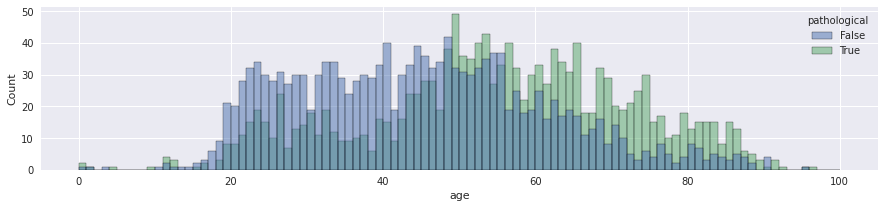

In [58]:
fig, ax = plt.subplots(1, 1, figsize=(15,3), sharex=True)
sns.histplot(data=d, x='age', hue='pathological', ax=ax, bins=np.linspace(0, 100, 101))

In [40]:
d_patho = d[d.pathological]

<AxesSubplot: xlabel='age', ylabel='Count'>

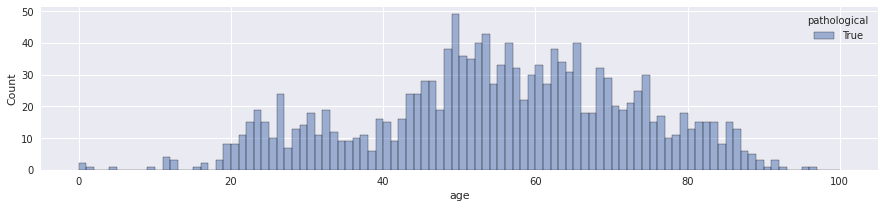

In [55]:
fig, ax = plt.subplots(1, 1, figsize=(15,3), sharex=True)
sns.histplot(data=d_patho, x='age', hue='pathological', ax=ax, bins=np.linspace(0, 100, 101))

In [54]:
d_patho[(d_patho.age>=18)&(d_patho.age<=86)]['age'].value_counts().min()

3

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15,3), sharex=True)
sns.histplot(data=d_patho, x='age', hue='pathological', ax=ax, bins=np.linspace(0, 100, 21))

In [81]:
d_aged = d[(d.age>=18)&(d.age<=86)]

In [139]:
def subsample_uniformly(d):
    min_age = 18
    max_age = 86
    n_per_age = 6
    d_uniform = pd.concat([g.head(n_per_age) for n, g in d.groupby(['pathological', 'age']) if (n[1] >= min_age) and (n[1] <= max_age)], axis=0)
    return d_uniform

In [140]:
d_uniform = subsample_uniformly(d)

Text(0.5, 1.0, 'n=802')

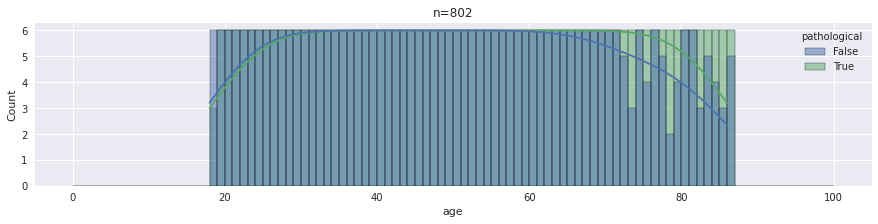

In [141]:
fig, ax = plt.subplots(1, 1, figsize=(15,3), sharex=True)
ax = sns.histplot(data=d_uniform, x='age', hue='pathological', ax=ax, bins=np.linspace(0, 100, 101), kde=True)
ax.set_title(f'n={len(d_uniform)}')

In [237]:
# adjust train to eval / valid distribution

In [238]:
d.shape

(2092, 12)

<AxesSubplot: xlabel='age', ylabel='Count'>

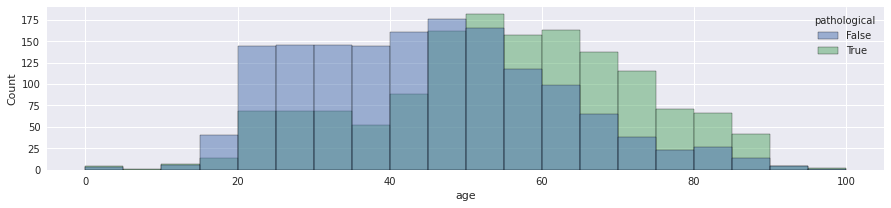

In [71]:
fig, ax = plt.subplots(1, 1, figsize=(15,3), sharex=True)
sns.histplot(data=d, x='age', hue='pathological', ax=ax, bins=np.linspace(0, 100, 21))

In [72]:
def match_pathological_distributions(d):
    d_p = d[d.pathological]
    d_n = d[~d.pathological]
#     print(d_p.shape, d_n.shape)

    max_age = max([d_p.age.max(), d_n.age.max()])

    subsampled = []
    for age in range(max_age+1):
        d_p_n = d_p[d_p.age==age]
        d_n_n = d_n[d_n.age==age]
        min_n = min(len(d_p_n), len(d_n_n))
#         print(age, min_n)
        subsampled.append(d_p_n.head(min_n))
        subsampled.append(d_n_n.head(min_n))
    subsampled = pd.concat(subsampled)
    return subsampled

In [73]:
d = match_pathological_distributions(d)

<AxesSubplot: xlabel='age', ylabel='Count'>

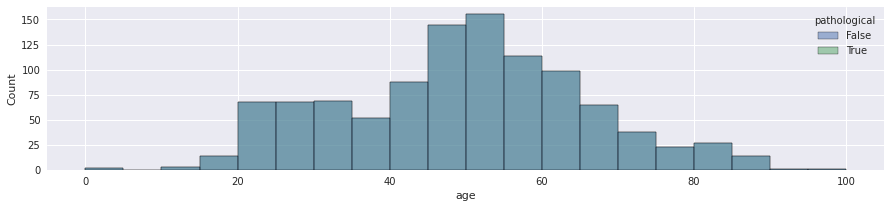

In [74]:
fig, ax = plt.subplots(1, 1, figsize=(15,3), sharex=True)
sns.histplot(data=d, x='age', hue='pathological', ax=ax, bins=np.linspace(0, 100, 21))

In [280]:
d_t, d_e = train_test_split(d, test_size=1/10, random_state=seed)

In [281]:
d_t.shape, d_e.shape

((1879, 12), (209, 12))

<AxesSubplot:xlabel='age', ylabel='Count'>

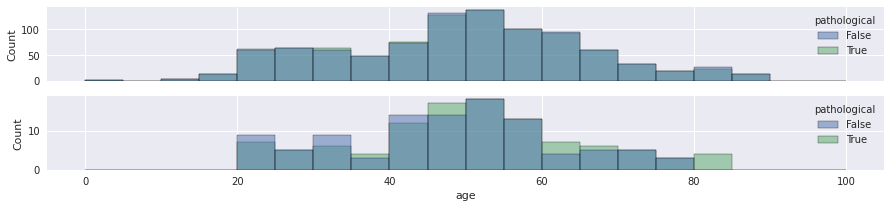

In [282]:
fig, ax_arr = plt.subplots(2, 1, figsize=(15,3), sharex=True)
sns.histplot(data=d_t, x='age', hue='pathological', ax=ax_arr[0], bins=np.linspace(0, 100, 21))
sns.histplot(data=d_e, x='age', hue='pathological', ax=ax_arr[1], bins=np.linspace(0, 100, 21))

In [283]:
d_t = match_pathological_distributions(d_t)
d_e = match_pathological_distributions(d_e)

<AxesSubplot:xlabel='age', ylabel='Count'>

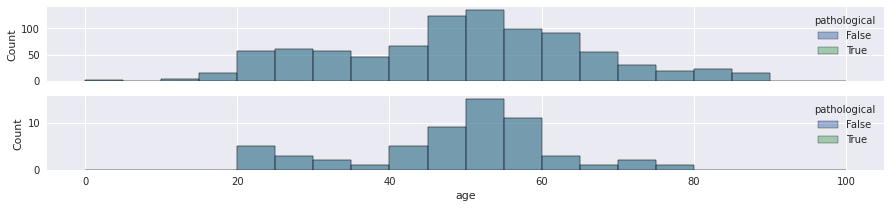

In [284]:
fig, ax_arr = plt.subplots(2, 1, figsize=(15,3), sharex=True)
sns.histplot(data=d_t, x='age', hue='pathological', ax=ax_arr[0], bins=np.linspace(0, 100, 21))
sns.histplot(data=d_e, x='age', hue='pathological', ax=ax_arr[1], bins=np.linspace(0, 100, 21))

In [292]:
d_t

,path,version,year,month,day,subject,session,segment,train,pathological,age,gender
1786,/home/jovyan/mne_data/TUH/tuh_eeg_abnormal/v2....,v2.0.0,2012,7,23,8982,1,4,True,True,0,M
2768,/home/jovyan/mne_data/TUH/tuh_eeg_abnormal/v2....,v2.0.0,2013,7,11,10505,1,2,True,False,0,F
1684,/home/jovyan/mne_data/TUH/tuh_eeg_abnormal/v2....,v2.0.0,2012,6,8,9424,1,4,True,True,1,M
2982,/home/jovyan/mne_data/TUH/tuh_eeg_abnormal/v2....,v2.0.0,2013,10,3,10831,1,0,True,False,1,M
2122,/home/jovyan/mne_data/TUH/tuh_eeg_abnormal/v2....,v2.0.0,2012,11,24,9647,1,0,False,True,11,M
...,...,...,...,...,...,...,...,...,...,...,...,...
2574,/home/jovyan/mne_data/TUH/tuh_eeg_abnormal/v2....,v2.0.0,2013,4,29,9924,1,1,True,False,87,F
2564,/home/jovyan/mne_data/TUH/tuh_eeg_abnormal/v2....,v2.0.0,2013,4,25,7788,2,0,True,True,88,M
288,/home/jovyan/mne_data/TUH/tuh_eeg_abnormal/v2....,v2.0.0,2010,5,19,6694,1,1,True,True,88,M
1155,/home/jovyan/mne_data/TUH/tuh_eeg_abnormal/v2....,v2.0.0,2011,11,28,8316,1,0,True,False,88,M


In [293]:
d_e

,path,version,year,month,day,subject,session,segment,train,pathological,age,gender
2958,/home/jovyan/mne_data/TUH/tuh_eeg_abnormal/v2....,v2.0.0,2013,9,14,10761,1,1,True,True,21,M
2960,/home/jovyan/mne_data/TUH/tuh_eeg_abnormal/v2....,v2.0.0,2013,9,16,10761,3,6,True,True,21,M
322,/home/jovyan/mne_data/TUH/tuh_eeg_abnormal/v2....,v2.0.0,2010,6,18,6741,1,1,True,False,21,M
1524,/home/jovyan/mne_data/TUH/tuh_eeg_abnormal/v2....,v2.0.0,2012,4,18,9788,1,0,True,False,21,F
995,/home/jovyan/mne_data/TUH/tuh_eeg_abnormal/v2....,v2.0.0,2011,10,10,8184,2,1,True,True,22,M
...,...,...,...,...,...,...,...,...,...,...,...,...
37,/home/jovyan/mne_data/TUH/tuh_eeg_abnormal/v2....,v2.0.0,2009,10,28,6096,1,0,False,True,72,F
2215,/home/jovyan/mne_data/TUH/tuh_eeg_abnormal/v2....,v2.0.0,2012,12,31,9662,1,1,True,False,72,M
53,/home/jovyan/mne_data/TUH/tuh_eeg_abnormal/v2....,v2.0.0,2009,11,20,6322,1,0,False,False,72,M
2167,/home/jovyan/mne_data/TUH/tuh_eeg_abnormal/v2....,v2.0.0,2012,12,11,9556,1,1,True,True,75,F


In [294]:
match_pathological_distributions(d_e[d_e.age==33])

,path,version,year,month,day,subject,session,segment,train,pathological,age,gender
338,/home/jovyan/mne_data/TUH/tuh_eeg_abnormal/v2....,v2.0.0,2010,6,30,6498,2,0,True,True,33,M
738,/home/jovyan/mne_data/TUH/tuh_eeg_abnormal/v2....,v2.0.0,2011,3,3,7715,1,0,True,False,33,M


In [295]:
def match_train_valid_distributions(d_t, d_v):
    n = min(len(d_t[d_t.pathological]), len(d_v[d_v.pathological]))
    return d_t.groupby('pathological').head(n), d_v.groupby('pathological').head(n)

In [296]:
d_t, d_e = match_train_valid_distributions(d_t, d_e)

In [297]:
d_t

,path,version,year,month,day,subject,session,segment,train,pathological,age,gender
1786,/home/jovyan/mne_data/TUH/tuh_eeg_abnormal/v2....,v2.0.0,2012,7,23,8982,1,4,True,True,0,M
2768,/home/jovyan/mne_data/TUH/tuh_eeg_abnormal/v2....,v2.0.0,2013,7,11,10505,1,2,True,False,0,F
1684,/home/jovyan/mne_data/TUH/tuh_eeg_abnormal/v2....,v2.0.0,2012,6,8,9424,1,4,True,True,1,M
2982,/home/jovyan/mne_data/TUH/tuh_eeg_abnormal/v2....,v2.0.0,2013,10,3,10831,1,0,True,False,1,M
2122,/home/jovyan/mne_data/TUH/tuh_eeg_abnormal/v2....,v2.0.0,2012,11,24,9647,1,0,False,True,11,M
...,...,...,...,...,...,...,...,...,...,...,...,...
962,/home/jovyan/mne_data/TUH/tuh_eeg_abnormal/v2....,v2.0.0,2011,9,24,8208,1,0,True,False,23,F
2350,/home/jovyan/mne_data/TUH/tuh_eeg_abnormal/v2....,v2.0.0,2013,2,14,10102,1,0,True,False,23,M
1481,/home/jovyan/mne_data/TUH/tuh_eeg_abnormal/v2....,v2.0.0,2012,4,6,9805,1,1,True,False,23,F
1113,/home/jovyan/mne_data/TUH/tuh_eeg_abnormal/v2....,v2.0.0,2011,11,15,8350,1,0,True,False,23,F


In [298]:
d_e

,path,version,year,month,day,subject,session,segment,train,pathological,age,gender
2958,/home/jovyan/mne_data/TUH/tuh_eeg_abnormal/v2....,v2.0.0,2013,9,14,10761,1,1,True,True,21,M
2960,/home/jovyan/mne_data/TUH/tuh_eeg_abnormal/v2....,v2.0.0,2013,9,16,10761,3,6,True,True,21,M
322,/home/jovyan/mne_data/TUH/tuh_eeg_abnormal/v2....,v2.0.0,2010,6,18,6741,1,1,True,False,21,M
1524,/home/jovyan/mne_data/TUH/tuh_eeg_abnormal/v2....,v2.0.0,2012,4,18,9788,1,0,True,False,21,F
995,/home/jovyan/mne_data/TUH/tuh_eeg_abnormal/v2....,v2.0.0,2011,10,10,8184,2,1,True,True,22,M
...,...,...,...,...,...,...,...,...,...,...,...,...
37,/home/jovyan/mne_data/TUH/tuh_eeg_abnormal/v2....,v2.0.0,2009,10,28,6096,1,0,False,True,72,F
2215,/home/jovyan/mne_data/TUH/tuh_eeg_abnormal/v2....,v2.0.0,2012,12,31,9662,1,1,True,False,72,M
53,/home/jovyan/mne_data/TUH/tuh_eeg_abnormal/v2....,v2.0.0,2009,11,20,6322,1,0,False,False,72,M
2167,/home/jovyan/mne_data/TUH/tuh_eeg_abnormal/v2....,v2.0.0,2012,12,11,9556,1,1,True,True,75,F


In [55]:
d_n = d[d.pathological == False]

In [57]:
d_p = d[d.pathological == True]

In [58]:
d_n.shape, d_p.shape

((1521, 12), (1472, 12))

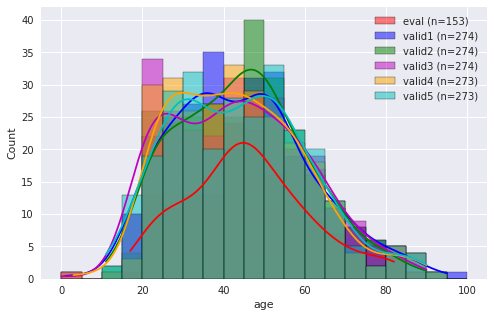

In [59]:
fig, ax = plt.subplots(1,1,figsize=(8,5))
train, eval = train_test_split(d_n, test_size=1/10, random_state=seed)
#sns.histplot(train, kde=True, bins=bins)
ax = sns.histplot(eval.age, kde=True, bins=bins, label=f'eval (n={len(eval)})', ax=ax, color='r')
train, valid1 = train_test_split(train, test_size=1/5, random_state=seed)
#sns.histplot(train, kde=True, bins=bins)
ax = sns.histplot(valid1.age, kde=True, bins=bins, label=f'valid1 (n={len(valid1)})', ax=ax, color='b')
train, valid2 = train_test_split(train, test_size=1/4, random_state=seed)
#sns.histplot(train, kde=True, bins=bins)
ax = sns.histplot(valid2.age, kde=True, bins=bins, label=f'valid2 (n={len(valid2)})', ax=ax, color='g')
train, valid3 = train_test_split(train, test_size=1/3, random_state=seed)
#sns.histplot(train, kde=True, bins=bins)
ax = sns.histplot(valid3.age, kde=True, bins=bins, label=f'valid3 (n={len(valid3)})', ax=ax, color='m')
valid4, valid5 = train_test_split(train, test_size=1/2, random_state=seed)
ax = sns.histplot(valid4.age, kde=True, bins=bins, label=f'valid4 (n={len(valid4)})', ax=ax, color='orange')
ax = sns.histplot(valid5.age, kde=True, bins=bins, label=f'valid5 (n={len(valid5)})', ax=ax, color='c')
ax.legend()
#fig.savefig('tuh_abnormal_re_split.jpg', bbox_inches='tight')

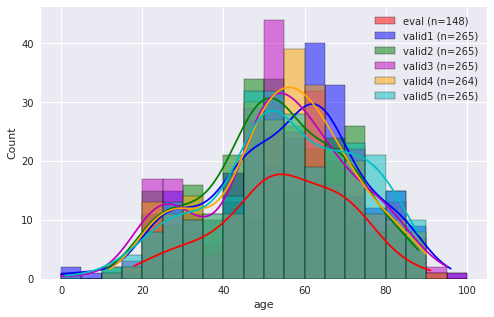

In [60]:
fig, ax = plt.subplots(1,1,figsize=(8,5))
train, eval = train_test_split(d_p, test_size=1/10, random_state=seed)
#sns.histplot(train, kde=True, bins=bins)
ax = sns.histplot(eval.age, kde=True, bins=bins, label=f'eval (n={len(eval)})', ax=ax, color='r')
train, valid1 = train_test_split(train, test_size=1/5, random_state=seed)
#sns.histplot(train, kde=True, bins=bins)
ax = sns.histplot(valid1.age, kde=True, bins=bins, label=f'valid1 (n={len(valid1)})', ax=ax, color='b')
train, valid2 = train_test_split(train, test_size=1/4, random_state=seed)
#sns.histplot(train, kde=True, bins=bins)
ax = sns.histplot(valid2.age, kde=True, bins=bins, label=f'valid2 (n={len(valid2)})', ax=ax, color='g')
train, valid3 = train_test_split(train, test_size=1/3, random_state=seed)
#sns.histplot(train, kde=True, bins=bins)
ax = sns.histplot(valid3.age, kde=True, bins=bins, label=f'valid3 (n={len(valid3)})', ax=ax, color='m')
valid4, valid5 = train_test_split(train, test_size=1/2, random_state=seed)
ax = sns.histplot(valid4.age, kde=True, bins=bins, label=f'valid4 (n={len(valid4)})', ax=ax, color='orange')
ax = sns.histplot(valid5.age, kde=True, bins=bins, label=f'valid5 (n={len(valid5)})', ax=ax, color='c')
ax.legend()
#fig.savefig('tuh_abnormal_re_split.jpg', bbox_inches='tight')

find good seed to split tuh abnormal subject-wise into train eval and plot subsets

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')

/tmp/ipykernel_424/249284140.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [3]:
d = pd.read_csv(
    #"/home/lukas/Code/brain_age/ds_descriptions/tuh_abnormal_description.csv",
    "/home/jovyan/mne_data/TUH/tuh_eeg_abnormal/tuh_abnormal_description.csv",
    index_col=0,
)

In [4]:
subjects = d.subject.unique()

In [5]:
subjects.shape

(2329,)

In [6]:
import sys
sys.path.insert(0, '/home/jovyan/braindecode/')

In [7]:
from decode_tueg import split, _reject_derivating_ages

Tue Jun  6 09:28:22 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.60.13    Driver Version: 525.60.13    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  On   | 00000000:3D:00.0 Off |                  N/A |
| 27%   26C    P8     1W / 250W |      1MiB / 11264MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [8]:
ids = _reject_derivating_ages(d)

In [9]:
d = d.iloc[ids].reset_index()

In [10]:
d.shape

(2718, 16)

In [11]:
base_seed = 20230101

In [12]:
df = []
for seed in range(31):
    train_is_, eval_is_ = split(d, subject_wise=True, valid_set_i=None, seed=base_seed+seed, shuffle=True)
    di = {}
    di['seed'] = base_seed+seed
    d_ = d.iloc[train_is_]
    mean = d_[~d_.pathological].groupby('gender').age.mean()
    di['train_M'] = mean.M
    di['train_F'] = mean.F
    d_ = d.iloc[eval_is_]
    mean = d_[~d_.pathological].groupby('gender').age.mean()
    di['eval_M'] = mean.M
    di['eval_F'] = mean.F
    df.append(di)
df = pd.DataFrame(df)

In [13]:
(df['train_F'] - df['train_M']).abs().min(), (df['eval_F'] - df['eval_M']).abs().min()

(2.365463467096866, 0.0034722222222214327)

In [14]:
((df['train_F'] - df['eval_F']).abs() + (df['train_M'] - df['eval_M']).abs()).argmin()

10

In [15]:
split_seed = int(df.iloc[10].seed)

In [16]:
split_seed

20230111

In [17]:
np.random.seed(split_seed)

In [18]:
train_is_, eval_is_ = split(d, subject_wise=True, valid_set_i=None, seed=split_seed, shuffle=True)

In [19]:
len(train_is_), len(eval_is_)

(2454, 264)

In [61]:
from decode_tueg import save_fig

In [70]:
from decode_tueg import age_pyramid

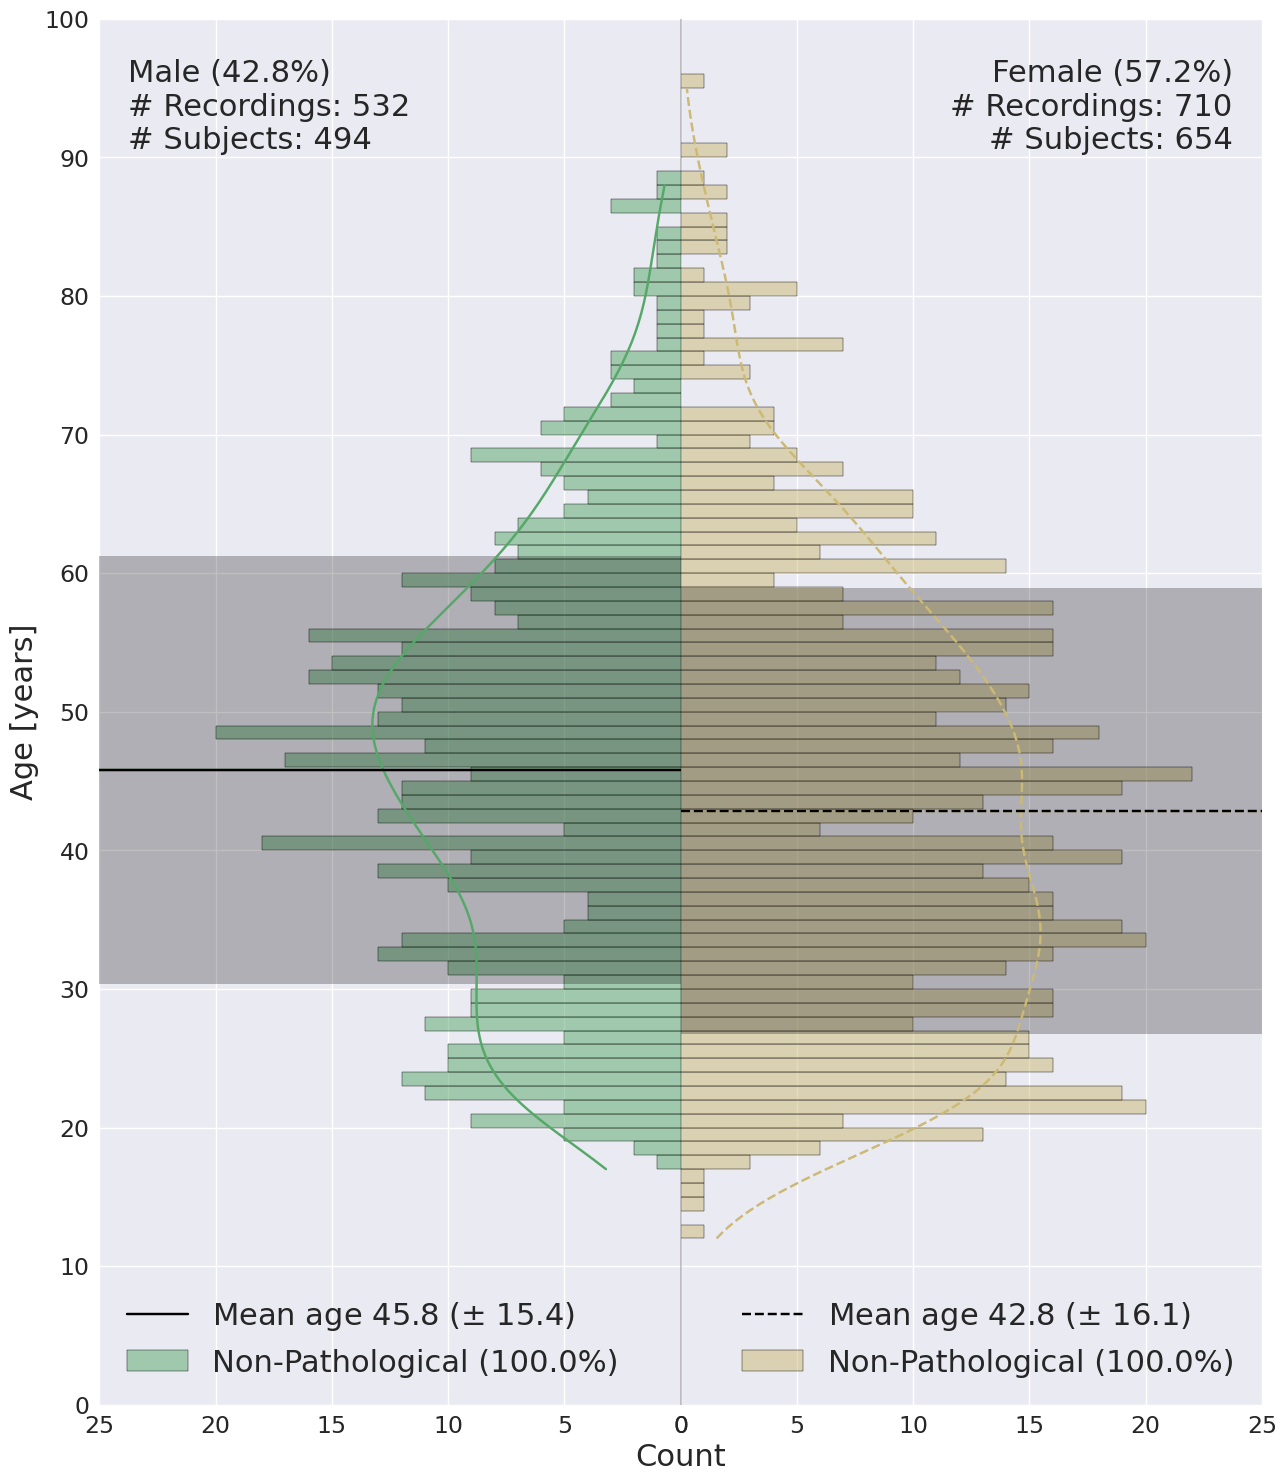

In [71]:
d_train = d.iloc[train_is_]
ax_arr = age_pyramid(d_train[~d_train.pathological], 'train', ylim=25, show_title=False, fs=22)
save_fig(ax_arr[0].get_figure(), '/home/jovyan/figures/', 'TUAB_non_patho_train_age_pyramid')

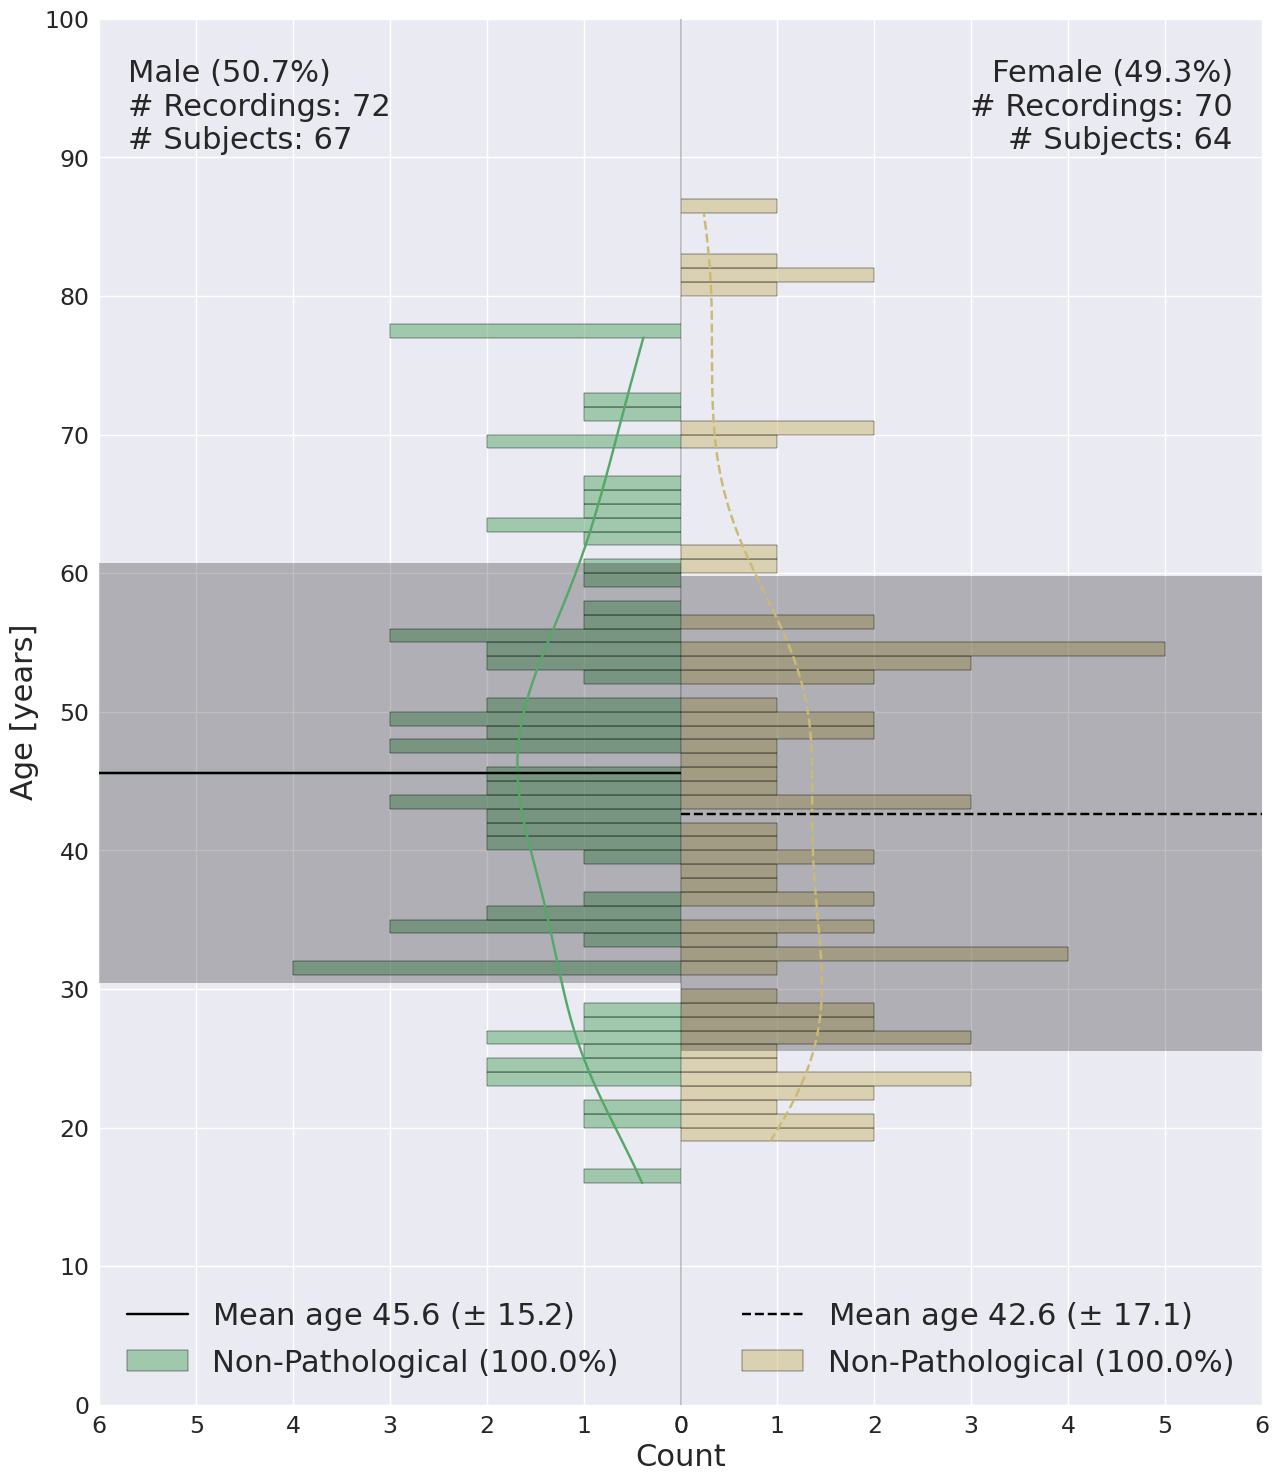

In [72]:
d_eval = d.iloc[eval_is_]
ax_arr = age_pyramid(d_eval[~d_eval.pathological], 'eval', ylim=6, show_title=False, fs=22)
save_fig(ax_arr[0].get_figure(), '/home/jovyan/figures/', 'TUAB_non_patho_eval_age_pyramid')

In [73]:
d_train.shape

(2454, 16)

0 1011 231 1242
1 954 288 1242
2 993 249 1242
3 1002 240 1242
4 1008 234 1242


Text(0.5, 0, 'Age [years]')

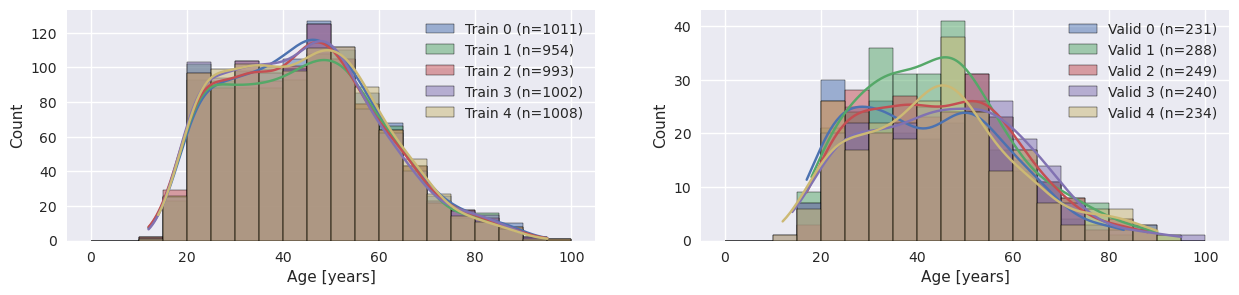

In [66]:
fig, ax_arr = plt.subplots(1, 2, figsize=(15,3), sharex=True)
all_valid_is = []
for i in range(5):
    train_is, valid_is = split(d_train.reset_index(), subject_wise=True, valid_set_i=i, seed=split_seed, shuffle=False)
    all_valid_is.extend(valid_is)
    d_train_ = d_train.iloc[train_is]
    d_train_ = d_train_[~d_train_.pathological]
    d_valid_ = d_train.iloc[valid_is]
    d_valid_ = d_valid_[~d_valid_.pathological]
    print(i, len(d_train_), len(d_valid_), len(d_train_)+len(d_valid_))
    ax1 = sns.histplot(
        data=d_valid_,
        x='age',
        bins=range(0,105,5), kde=True,
        label=f'Valid {i} (n={len(d_valid_)})',
        ax=ax_arr[1],
    )
    ax2 = sns.histplot(
        data=d_train_, 
        x='age', 
        bins=range(0,105,5), kde=True, 
        label=f'Train {i} (n={len(d_train_)})',
        ax=ax_arr[0],
    )
ax1.legend()
ax2.legend()
ax1.set_xlabel("Age [years]")
ax2.set_xlabel("Age [years]")

In [67]:
assert len(all_valid_is) == len(set(all_valid_is))

In [74]:
import sys
sys.path.insert(0, '/home/jovyan/braindecode/')

In [75]:
import logging

In [76]:
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)
logging.debug("test")

DEBUG:root:test


In [77]:
from braindecode.datasets import TUHAbnormal

In [78]:
data_path = '/home/jovyan/mne_data/TUH_PRE/tuh_eeg_abnormal/'
n_jobs = 4
target_name = 'age'

In [79]:
logger.debug("indexing files")
tuabn_train = TUHAbnormal(
    path=data_path,
    preload=False,
    add_physician_reports=True,
    n_jobs=n_jobs,
    target_name = 'age' if target_name in ['age', 'age_clf'] else target_name,
)
logger.debug(f'after read {len(tuabn_train.datasets)}')

DEBUG:root:indexing files
DEBUG:root:after read 2993


In [80]:
from decode_tueg import reject_derivating_ages

In [81]:
exclude_derivating_ages = 1
if exclude_derivating_ages != -1:
    tuabn_train = reject_derivating_ages(tuabn_train)
logger.debug(f'after exclude {len(tuabn_train.datasets)}')

2023-06-06 12:18:53 INFO     rejecting recordings with > 1 year derivation in header, dates, and report
2023-06-06 12:18:53 INFO     rejecting recordings with > 1 year derivation in header, dates, and report
2023-06-06 12:18:53 INFO     rejecting recordings with > 1 year derivation in header, dates, and report
2023-06-06 12:18:53 INFO     rejecting recordings with > 1 year derivation in header, dates, and report
2023-06-06 12:18:53 INFO     rejecting recordings with > 1 year derivation in header, dates, and report
2023-06-06 12:18:53 INFO     rejecting recordings with > 1 year derivation in header, dates, and report
2023-06-06 12:18:53 INFO     rejecting recordings with > 1 year derivation in header, dates, and report
2023-06-06 12:18:53 INFO     rejecting recordings with > 1 year derivation in header, dates, and report
2023-06-06 12:18:53 INFO     rejecting recordings with > 1 year derivation in header, dates, and report
2023-06-06 12:18:53 INFO     rejecting recordings with > 1 year 

INFO:decode_tueg:rejecting recordings with > 1 year derivation in header, dates, and report


2023-06-06 12:18:53 DEBUG    there are 1472 patho and 1521 non-patho recordings in total
2023-06-06 12:18:53 DEBUG    there are 1472 patho and 1521 non-patho recordings in total
2023-06-06 12:18:53 DEBUG    there are 1472 patho and 1521 non-patho recordings in total
2023-06-06 12:18:53 DEBUG    there are 1472 patho and 1521 non-patho recordings in total
2023-06-06 12:18:53 DEBUG    there are 1472 patho and 1521 non-patho recordings in total
2023-06-06 12:18:53 DEBUG    there are 1472 patho and 1521 non-patho recordings in total
2023-06-06 12:18:53 DEBUG    there are 1472 patho and 1521 non-patho recordings in total
2023-06-06 12:18:53 DEBUG    there are 1472 patho and 1521 non-patho recordings in total
2023-06-06 12:18:53 DEBUG    there are 1472 patho and 1521 non-patho recordings in total
2023-06-06 12:18:53 DEBUG    there are 1472 patho and 1521 non-patho recordings in total
2023-06-06 12:18:53 DEBUG    there are 1472 patho and 1521 non-patho recordings in total


DEBUG:decode_tueg:there are 1472 patho and 1521 non-patho recordings in total


2023-06-06 12:19:13 DEBUG    there are 1334 patho and 1384 non-patho recordings left
2023-06-06 12:19:13 DEBUG    there are 1334 patho and 1384 non-patho recordings left
2023-06-06 12:19:13 DEBUG    there are 1334 patho and 1384 non-patho recordings left
2023-06-06 12:19:13 DEBUG    there are 1334 patho and 1384 non-patho recordings left
2023-06-06 12:19:13 DEBUG    there are 1334 patho and 1384 non-patho recordings left
2023-06-06 12:19:13 DEBUG    there are 1334 patho and 1384 non-patho recordings left
2023-06-06 12:19:13 DEBUG    there are 1334 patho and 1384 non-patho recordings left
2023-06-06 12:19:13 DEBUG    there are 1334 patho and 1384 non-patho recordings left
2023-06-06 12:19:13 DEBUG    there are 1334 patho and 1384 non-patho recordings left
2023-06-06 12:19:13 DEBUG    there are 1334 patho and 1384 non-patho recordings left
2023-06-06 12:19:13 DEBUG    there are 1334 patho and 1384 non-patho recordings left


DEBUG:decode_tueg:there are 1334 patho and 1384 non-patho recordings left
DEBUG:root:after exclude 2718


In [82]:
subsample = -1
if subsample != -1:
    logger.info(f'subsampling age distributions for pathological and non-pathological recordings ({subsample})')
    d = tuabn_train.description
    logger.debug(f'there are {d.pathological.sum()} patho and {len(d)-d.pathological.sum()} non-patho recordings in total')
    if subsample == 'match':
        d = match_pathological_distributions(d)
    elif subsample == 'uniform':
        d = subsample_uniformly(d)
    else:
        raise ValueError
    tuabn_train = tuabn_train.split([d.sort_index().index.to_list()])['0']
    d = tuabn_train.description
    logger.debug(f'there are {d.pathological.sum()} patho and {len(d)-d.pathological.sum()} non-patho recordings left')

In [83]:
from decode_tueg import get_dataset_splits, subselect

In [84]:
cv_train_ages = []
cv_valid_ages = []

In [85]:
valid_set_i = 0
shuffle_data_before_split = 1
seed = 20230111
final_eval = 0
test_name = lambda x: 'valid' if x == 0 else 'eval'
subset = 'normal'
subject_wise = True

In [92]:
# split into train / eval | train / valid
logger.debug(f"splitting dataset with {len(tuabn_train.description)} recordings")
tuabn_train, tuabn_valid = get_dataset_splits(
        tuabn_train, target_name, valid_set_i, subject_wise=subject_wise, 
    shuffle=shuffle_data_before_split, seed=seed, final_eval=final_eval,
)
logger.debug(f'after split {len(tuabn_train.datasets)}')
if final_eval == 1:
    tuabn_valid = tuabn_eval

DEBUG:root:splitting dataset with 2718 recordings


2023-06-06 12:21:16 DEBUG    subject wise 
2023-06-06 12:21:16 DEBUG    subject wise 
2023-06-06 12:21:16 DEBUG    subject wise 
2023-06-06 12:21:16 DEBUG    subject wise 
2023-06-06 12:21:16 DEBUG    subject wise 
2023-06-06 12:21:16 DEBUG    subject wise 
2023-06-06 12:21:16 DEBUG    subject wise 
2023-06-06 12:21:16 DEBUG    subject wise 
2023-06-06 12:21:16 DEBUG    subject wise 
2023-06-06 12:21:16 DEBUG    subject wise 
2023-06-06 12:21:16 DEBUG    subject wise 


DEBUG:decode_tueg:subject wise 


2023-06-06 12:21:16 DEBUG    into train (0.9) and eval (0.1).
2023-06-06 12:21:16 DEBUG    into train (0.9) and eval (0.1).
2023-06-06 12:21:16 DEBUG    into train (0.9) and eval (0.1).
2023-06-06 12:21:16 DEBUG    into train (0.9) and eval (0.1).
2023-06-06 12:21:16 DEBUG    into train (0.9) and eval (0.1).
2023-06-06 12:21:16 DEBUG    into train (0.9) and eval (0.1).
2023-06-06 12:21:16 DEBUG    into train (0.9) and eval (0.1).
2023-06-06 12:21:16 DEBUG    into train (0.9) and eval (0.1).
2023-06-06 12:21:16 DEBUG    into train (0.9) and eval (0.1).
2023-06-06 12:21:16 DEBUG    into train (0.9) and eval (0.1).
2023-06-06 12:21:16 DEBUG    into train (0.9) and eval (0.1).


DEBUG:decode_tueg:into train (0.9) and eval (0.1).


2023-06-06 12:21:16 DEBUG    after train eval 2475, 243
2023-06-06 12:21:16 DEBUG    after train eval 2475, 243
2023-06-06 12:21:16 DEBUG    after train eval 2475, 243
2023-06-06 12:21:16 DEBUG    after train eval 2475, 243
2023-06-06 12:21:16 DEBUG    after train eval 2475, 243
2023-06-06 12:21:16 DEBUG    after train eval 2475, 243
2023-06-06 12:21:16 DEBUG    after train eval 2475, 243
2023-06-06 12:21:16 DEBUG    after train eval 2475, 243
2023-06-06 12:21:16 DEBUG    after train eval 2475, 243
2023-06-06 12:21:16 DEBUG    after train eval 2475, 243
2023-06-06 12:21:16 DEBUG    after train eval 2475, 243


DEBUG:decode_tueg:after train eval 2475, 243


2023-06-06 12:21:16 INFO     validation run
2023-06-06 12:21:16 INFO     validation run
2023-06-06 12:21:16 INFO     validation run
2023-06-06 12:21:16 INFO     validation run
2023-06-06 12:21:16 INFO     validation run
2023-06-06 12:21:16 INFO     validation run
2023-06-06 12:21:16 INFO     validation run
2023-06-06 12:21:16 INFO     validation run
2023-06-06 12:21:16 INFO     validation run
2023-06-06 12:21:16 INFO     validation run
2023-06-06 12:21:16 INFO     validation run


INFO:decode_tueg:validation run


2023-06-06 12:21:17 DEBUG    splitting dataset with 2475 recordings
2023-06-06 12:21:17 DEBUG    splitting dataset with 2475 recordings
2023-06-06 12:21:17 DEBUG    splitting dataset with 2475 recordings
2023-06-06 12:21:17 DEBUG    splitting dataset with 2475 recordings
2023-06-06 12:21:17 DEBUG    splitting dataset with 2475 recordings
2023-06-06 12:21:17 DEBUG    splitting dataset with 2475 recordings
2023-06-06 12:21:17 DEBUG    splitting dataset with 2475 recordings
2023-06-06 12:21:17 DEBUG    splitting dataset with 2475 recordings
2023-06-06 12:21:17 DEBUG    splitting dataset with 2475 recordings
2023-06-06 12:21:17 DEBUG    splitting dataset with 2475 recordings
2023-06-06 12:21:17 DEBUG    splitting dataset with 2475 recordings


DEBUG:decode_tueg:splitting dataset with 2475 recordings


2023-06-06 12:21:17 DEBUG    subject wise 
2023-06-06 12:21:17 DEBUG    subject wise 
2023-06-06 12:21:17 DEBUG    subject wise 
2023-06-06 12:21:17 DEBUG    subject wise 
2023-06-06 12:21:17 DEBUG    subject wise 
2023-06-06 12:21:17 DEBUG    subject wise 
2023-06-06 12:21:17 DEBUG    subject wise 
2023-06-06 12:21:17 DEBUG    subject wise 
2023-06-06 12:21:17 DEBUG    subject wise 
2023-06-06 12:21:17 DEBUG    subject wise 
2023-06-06 12:21:17 DEBUG    subject wise 


DEBUG:decode_tueg:subject wise 


2023-06-06 12:21:17 DEBUG    into train (.8) and valid (.2).
2023-06-06 12:21:17 DEBUG    into train (.8) and valid (.2).
2023-06-06 12:21:17 DEBUG    into train (.8) and valid (.2).
2023-06-06 12:21:17 DEBUG    into train (.8) and valid (.2).
2023-06-06 12:21:17 DEBUG    into train (.8) and valid (.2).
2023-06-06 12:21:17 DEBUG    into train (.8) and valid (.2).
2023-06-06 12:21:17 DEBUG    into train (.8) and valid (.2).
2023-06-06 12:21:17 DEBUG    into train (.8) and valid (.2).
2023-06-06 12:21:17 DEBUG    into train (.8) and valid (.2).
2023-06-06 12:21:17 DEBUG    into train (.8) and valid (.2).
2023-06-06 12:21:17 DEBUG    into train (.8) and valid (.2).


DEBUG:decode_tueg:into train (.8) and valid (.2).


2023-06-06 12:21:17 DEBUG    after train valid 1978, 497
2023-06-06 12:21:17 DEBUG    after train valid 1978, 497
2023-06-06 12:21:17 DEBUG    after train valid 1978, 497
2023-06-06 12:21:17 DEBUG    after train valid 1978, 497
2023-06-06 12:21:17 DEBUG    after train valid 1978, 497
2023-06-06 12:21:17 DEBUG    after train valid 1978, 497
2023-06-06 12:21:17 DEBUG    after train valid 1978, 497
2023-06-06 12:21:17 DEBUG    after train valid 1978, 497
2023-06-06 12:21:17 DEBUG    after train valid 1978, 497
2023-06-06 12:21:17 DEBUG    after train valid 1978, 497
2023-06-06 12:21:17 DEBUG    after train valid 1978, 497


DEBUG:decode_tueg:after train valid 1978, 497
DEBUG:root:after split 1978


In [93]:
# select normal/abnormal only
logger.info(f"from train ({len(tuabn_train.datasets)}) and {test_name(final_eval)}"
            f" ({len(tuabn_valid.datasets)}) selecting {subset}")
tuabn_train, _ = subselect(tuabn_train, subset)
tuabn_valid, valid_rest = subselect(tuabn_valid, subset)
logger.debug(f"selected train ({len(tuabn_train.datasets)}) and {test_name(final_eval)}"
             f" ({len(tuabn_valid.datasets)})")
logger.debug(f"valid_rest (aka not {subset}) has {len(valid_rest.datasets)}")

INFO:root:from train (1978) and valid (497) selecting normal
DEBUG:root:selected train (1007) and valid (240)
DEBUG:root:valid_rest (aka not normal) has 257


In [94]:
min_age = -1
max_age = -1

In [95]:
# TODO: add male /female subselection?

# select based on age
if min_age != -1 or max_age != -1:
    logger.info(f"removing recordings of underage subjects")
    tuabn_train = subselect(dataset=tuabn_train, subset=(min_age, max_age))
    tuabn_valid = subselect(dataset=tuabn_valid, subset=(min_age, max_age))
    valid_rest = subselect(dataset=valid_rest, subset=(min_age, max_age))
    logger.debug(f"selected train ({len(tuabn_train.datasets)}) and {test_name(final_eval)}"
                 f" ({len(tuabn_valid.datasets)})")
    logger.debug(f"valid_rest (aka not {subset}) has {len(valid_rest.datasets)}")
valid_rest_name = f'valid_not_{subset}'

In [96]:
n_train_recordings = -1

In [97]:
# reduce number of train recordings
if n_train_recordings != -1:
    tuabn_train = tuabn_train.split([list(range(n_train_recordings))])['0']
    logger.debug(f"selected {n_train_recordings} train recordings")

In [98]:
from decode_tueg import age_pyramid

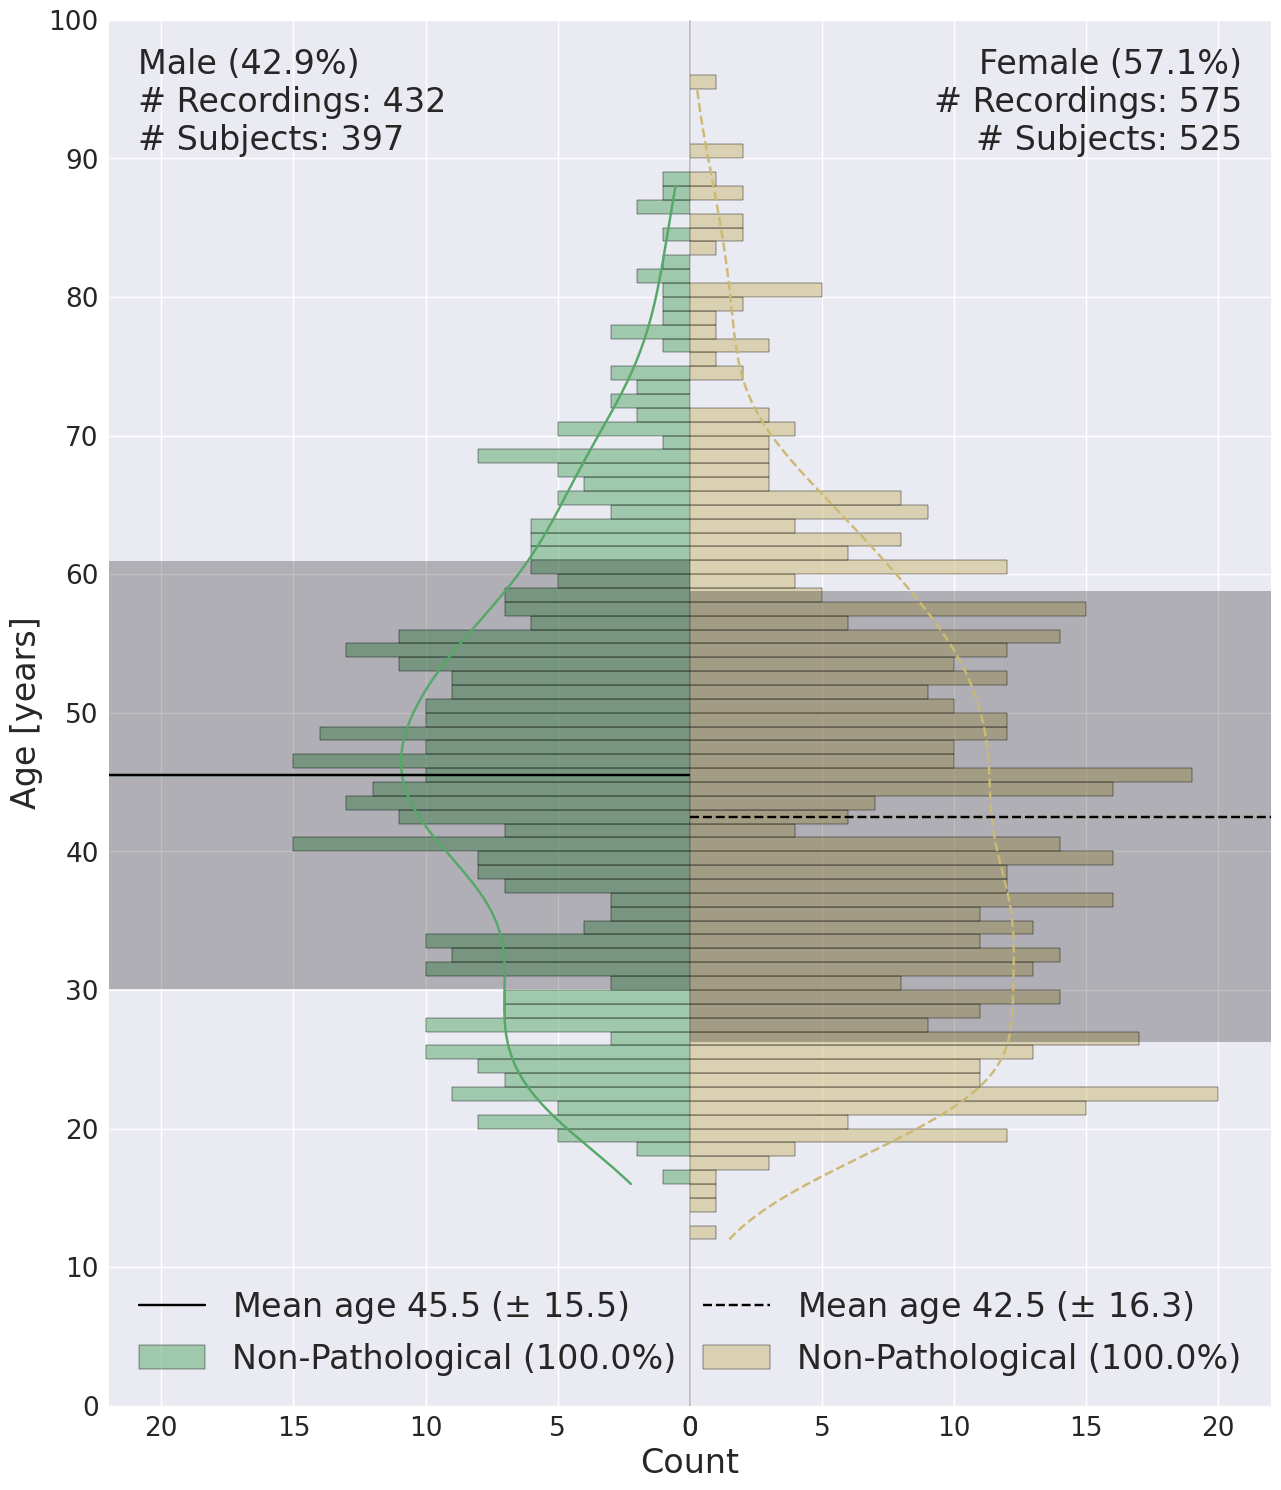

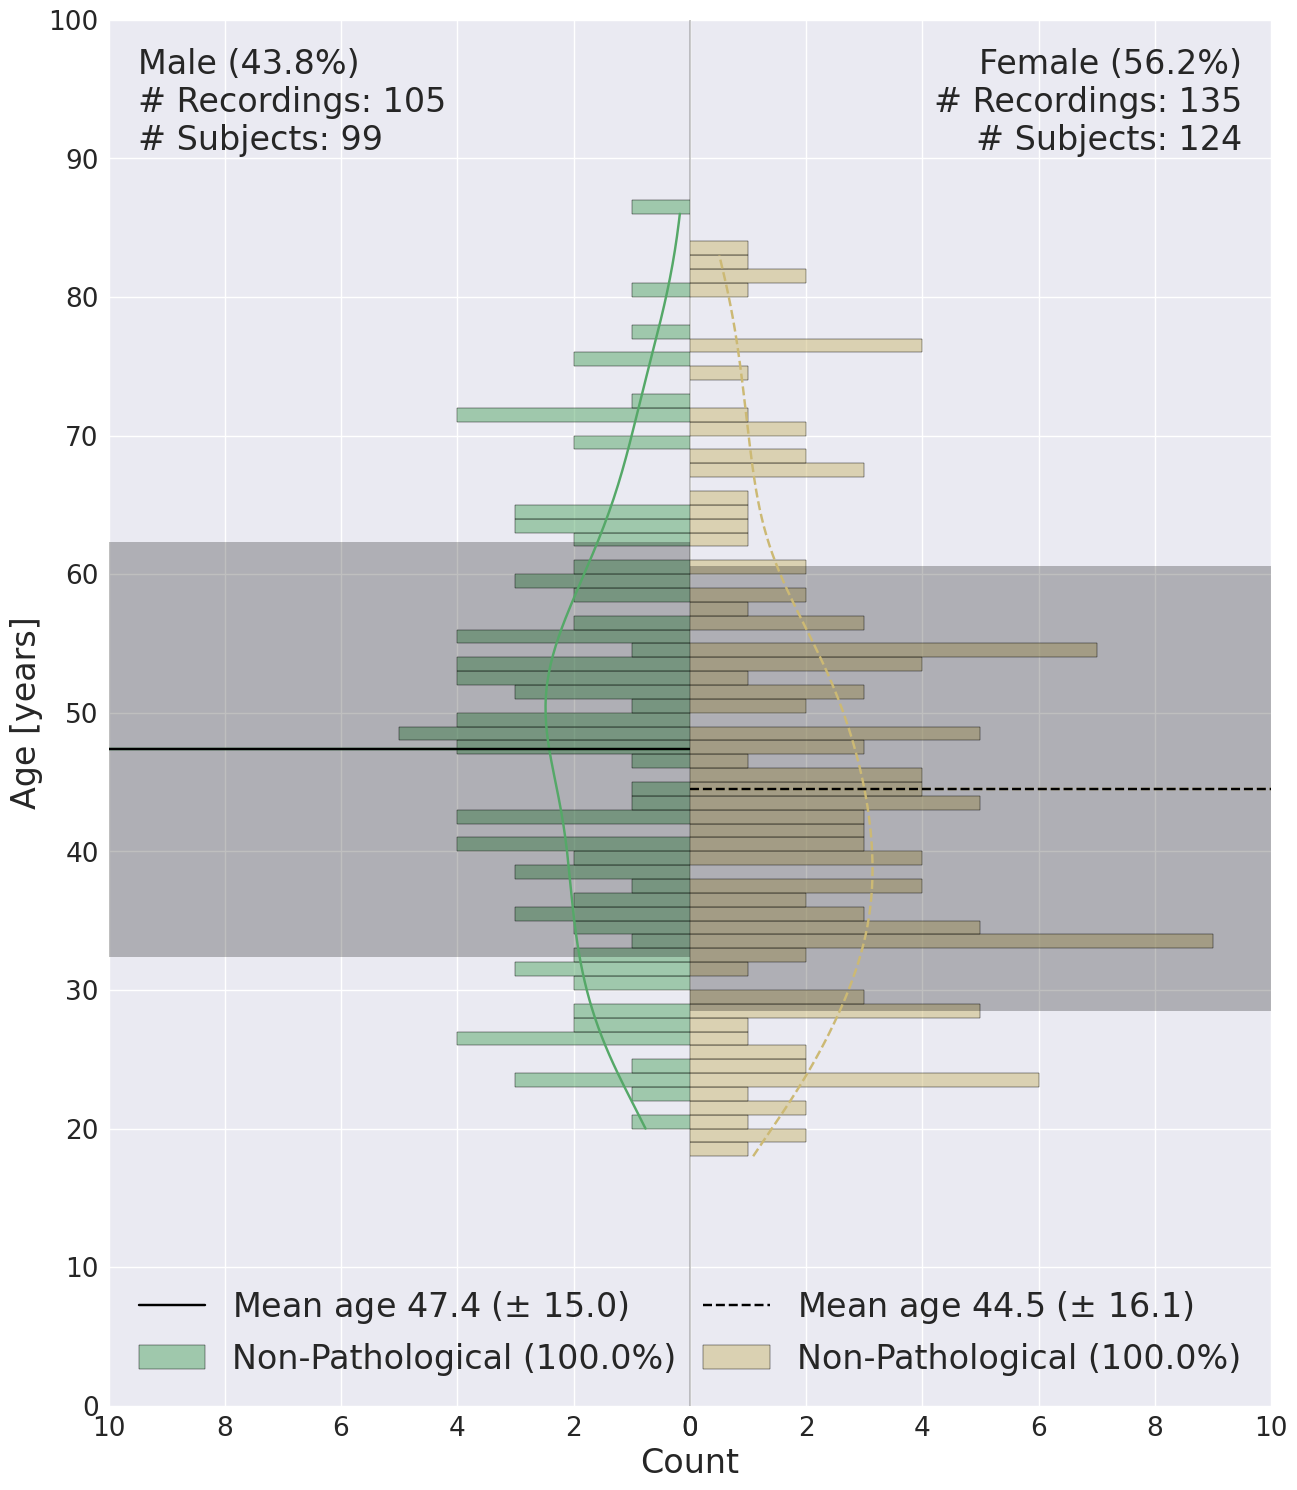

In [99]:
ax_arr = age_pyramid(tuabn_train.description, 'train', show_title=False, ylim=22)
ax_arr = age_pyramid(tuabn_valid.description, 'valid/eval', show_title=False, ylim=10)

In [139]:
# read the actual splits from cv decoding runs

In [140]:
import sys
sys.path.insert(0, '/home/jovyan/braindecode/')

In [141]:
import pandas as pd

In [142]:
from decode_tueg import age_pyramid

In [143]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns

/tmp/ipykernel_424/3623796850.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


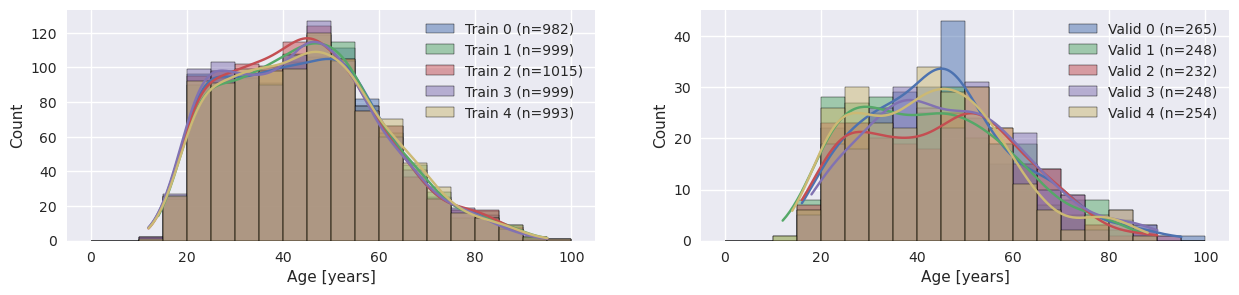

In [149]:
fig, ax_arr = plt.subplots(1, 2, figsize=(15,3), sharex=True)
for i in range(5):
    for subset in ['Train', 'Valid']:
        preds = pd.read_csv(
            f'/home/jovyan/experiments/2023-02-15T18:59:11.767923/20230214/{i}/preds/train_end_{subset.lower()}_preds.csv', 
            index_col=0,
        )
        df = preds[['age', 'pathological', 'gender', 'subject']]

        ax = ax_arr[0] if subset == 'Train' else ax_arr[1]
        ax = sns.histplot(
            data=df,
            x='age',
            bins=range(0,105,5), kde=True,
            label=f'{subset} {i} (n={len(df)})',
            ax=ax,
        )
        ax.legend()
        ax.legend()
        ax.set_xlabel("Age [years]")
        ax.set_xlabel("Age [years]")

In [150]:
save_fig(ax_arr[0].get_figure(), '/home/jovyan/figures/', 'TUAB_non_patho_cv_age_pyramids')

In [133]:
train_ages = pd.read_csv(
    '/home/jovyan/experiments/2023-02-15T18:43:26.819382/20230214/0/preds/train_end_train_preds.csv',
    index_col=0,
)

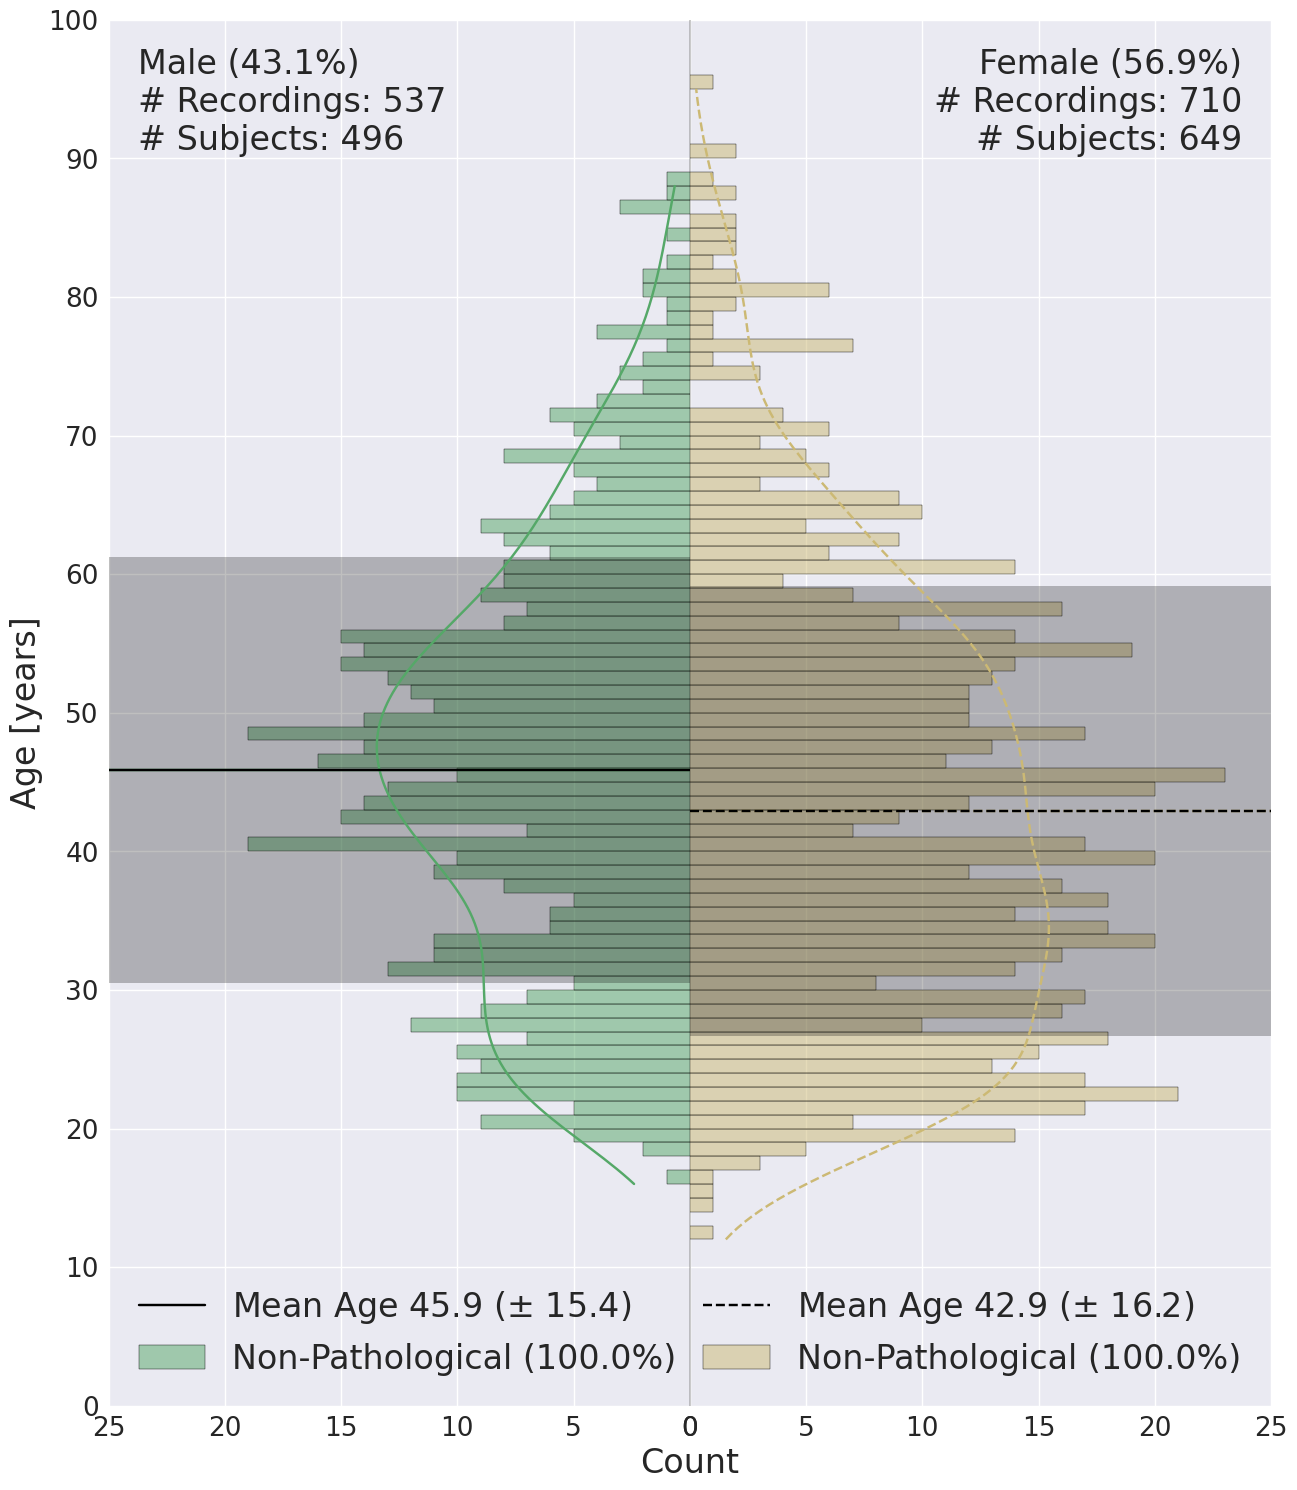

In [134]:
ax_arr = age_pyramid(train_ages, 'eval', ylim=25, show_title=False)
save_fig(ax_arr[0].get_figure(), '/home/jovyan/figures/', 'TUAB_non_patho_train_age_pyramid')

In [135]:
710+537

1247

In [136]:
eval_ages = pd.read_csv(
    '/home/jovyan/experiments/2023-02-15T18:43:26.819382/20230214/0/preds/train_end_eval_preds.csv',
    index_col=0,
)

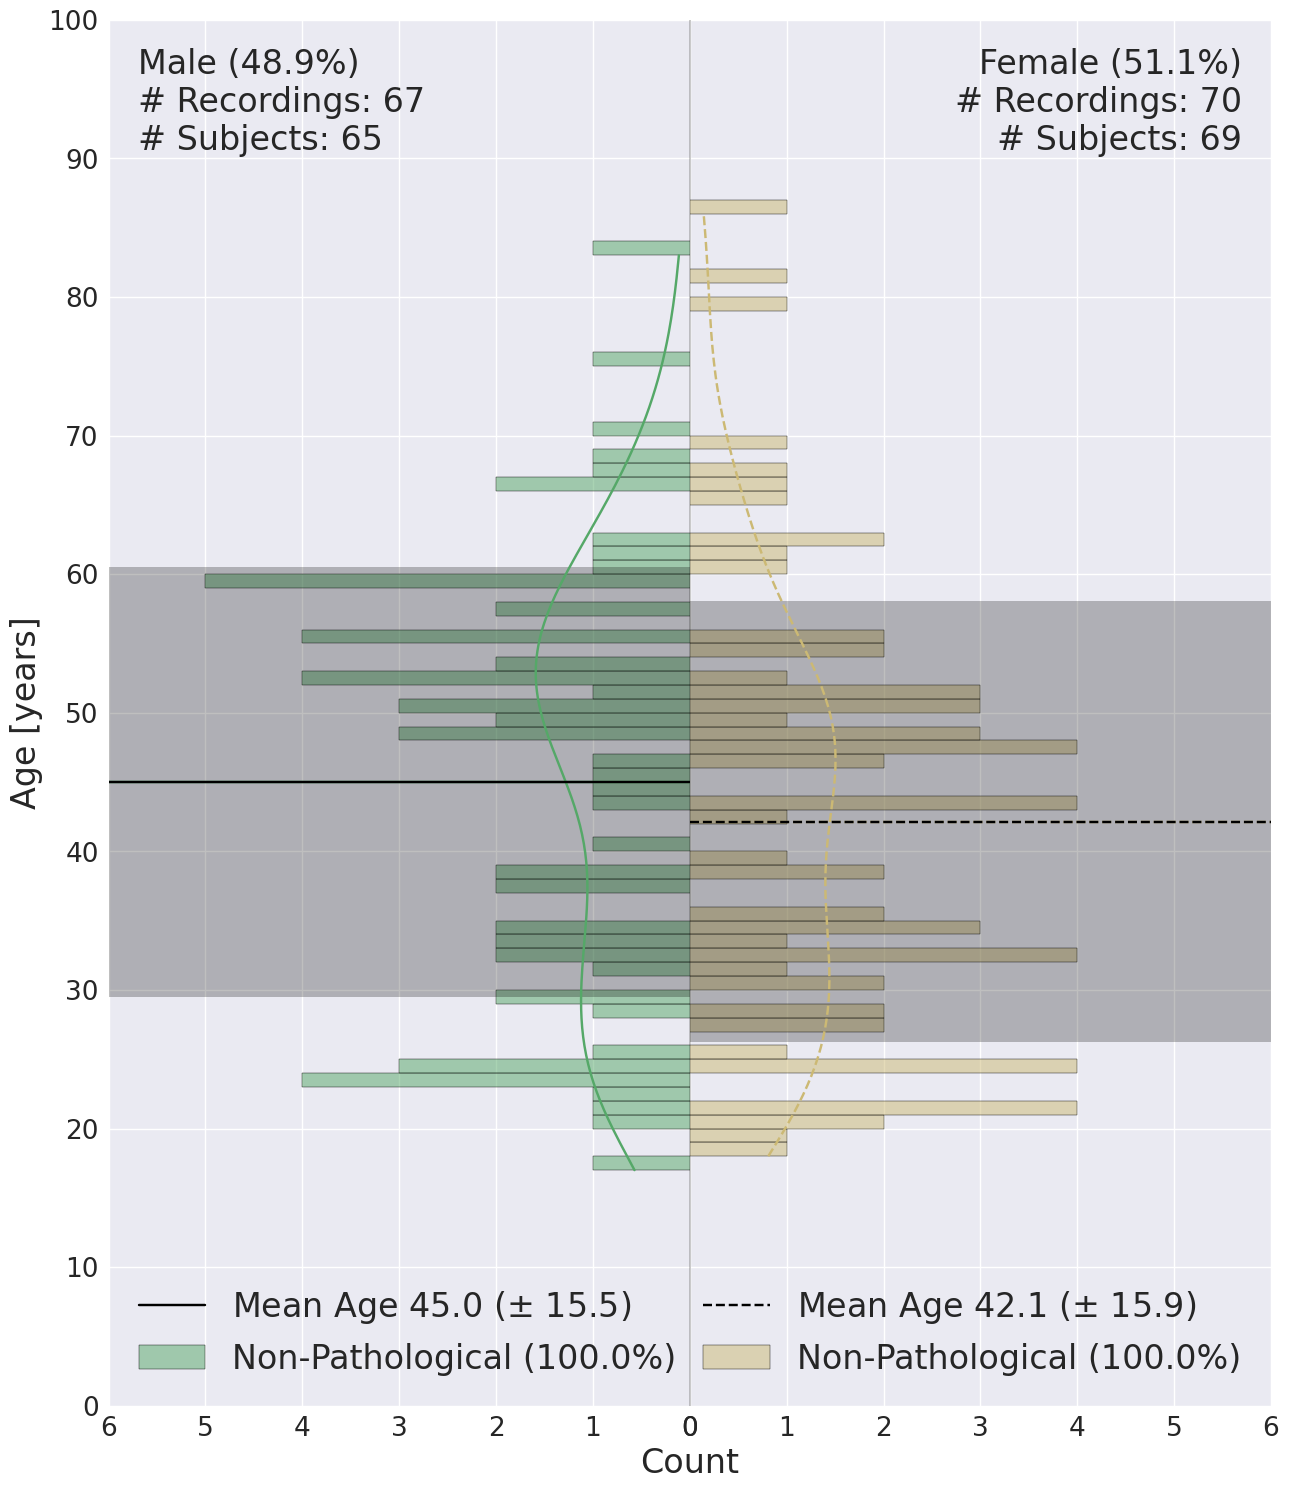

In [137]:
ax_arr = age_pyramid(eval_ages, 'eval', ylim=6, show_title=False)
save_fig(ax_arr[0].get_figure(), '/home/jovyan/figures/', 'TUAB_non_patho_eval_age_pyramid')

In [138]:
67+70

137